# K-means clusterings

<AxesSubplot:xlabel='x1', ylabel='x2'>

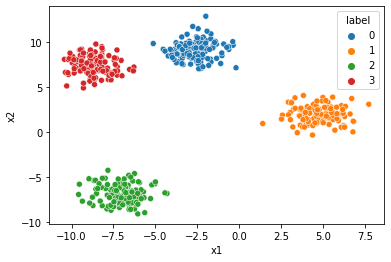

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)

sns.scatterplot(data = df, x="x1", y="x2", hue="label", palette= "tab10")

In [3]:
X = df.drop("label", axis = "columns")
X.head(3)

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:3]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895]])

In [5]:
scaled_X.mean(), scaled_X.std()

(-1.0658141036401503e-17, 1.0)

Text(0.5, 1.0, 'Scaled X with feature standardization')

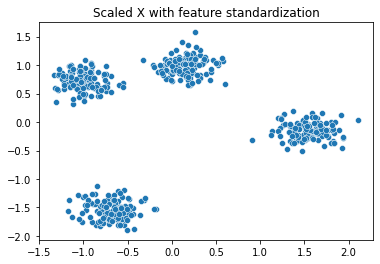

In [6]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization")

[Text(0.5, 1.0, 'Elbow plot'), Text(0.5, 0, 'k_clusters'), Text(0, 0.5, 'SSD')]

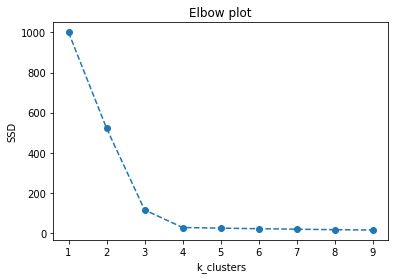

In [7]:
from sklearn.cluster import KMeans

clusters = np.arange(1,10)
sum_squared_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters]

fig, ax= plt.figure(), plt.axes()
ax.plot(clusters, sum_squared_distances, "--o")
ax.set(title = "Elbow plot", xlabel = "k_clusters", ylabel = "SSD")

In [8]:
pd.Series(sum_squared_distances).diff()

0           NaN
1   -477.842946
2   -406.061375
3    -87.308740
4     -3.141136
5     -2.788385
6     -2.379885
7     -2.592252
8     -1.476423
dtype: float64

## Silhouette score

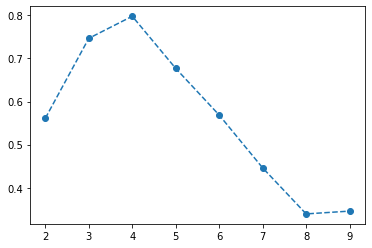

In [9]:
from sklearn.metrics import silhouette_score

fig, ax = plt.figure(), plt.axes()

kmeans = [KMeans(k).fit(scaled_X) for k in clusters]
## Silhouette_score require clustes >= 2
silhouette_score = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
ax.plot(clusters[1:], silhouette_score, "--o")

## Visualization

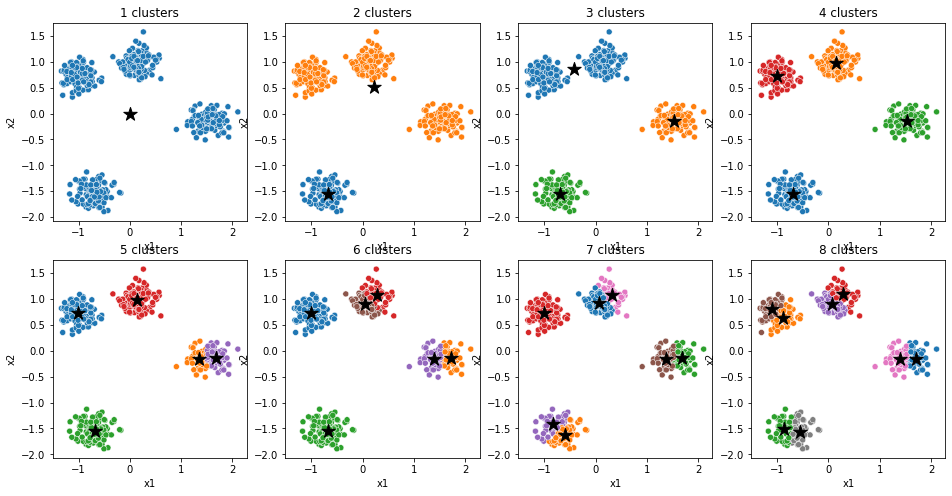

In [10]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

# num_plots_row = len(clusters)/2
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["labels"] = kmeans[i].labels_

    sns.scatterplot(data = df_plot, x="x1", y="x2", hue = "labels", ax = ax, palette = "tab10")
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = "*", s=200, color="black")
    ax.legend([], [], frameon = False)
    ax.set(title = f"{i+1} clusters")

In [11]:
KMeans(2).fit(scaled_X).labels_

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,